# 🎓📊 Stacking Classifier Implementation — Student Performance Prediction 📚🤖
## Overview:
### This notebook demonstrates the implementation of a Stacking Classifier — an advanced ensemble learning technique — 
### to predict student performance based on various academic and demographic features.

### The stacking classifier combines multiple base models like Logistic Regression, K-Nearest Neighbors, 
### and Decision Trees to improve overall accuracy by learning from their collective predictions. This approach helps in leveraging the strengths of different algorithms and boosting predictive performance.



# 1. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn


# 2. Load Dataset

In [2]:
df = pd.read_csv("student_performance_dataset (1).csv")

In [3]:
df

,Gender,Parental Education Level,Your Interest,Test Preparation,Hours Studied,Attendance,Class Group,Performance
0,Male,High School,Music,Completed,4.7,83.6,B,Excellent
1,Male,Doctorate,Reading and Literature,Completed,5.0,100.0,D,Excellent
2,Male,High School,Arts & Creativity,Completed,3.6,72.7,E,Average
3,Male,Master’s Degree,Technology and Computers,NaN,4.9,92.7,E,Excellent
4,Female,Some College,Sports & Athletics,Completed,3.3,80.4,A,Good
...,...,...,...,...,...,...,...,...
995,Female,Bachelor’s Degree,Technology and Computers,NaN,3.7,82.5,C,Good
996,Female,Doctorate,Reading and Literature,Completed,5.8,92.1,A,Excellent
997,Male,Some College,Music,Completed,4.5,95.7,C,Excellent
998,Female,Doctorate,Music,NaN,2.5,66.2,D,Average


# 3. Information About the Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    1000 non-null   object 
 1   Parental Education Level  1000 non-null   object 
 2   Your Interest             1000 non-null   object 
 3   Test Preparation          586 non-null    object 
 4   Hours Studied             1000 non-null   float64
 5   Attendance                1000 non-null   float64
 6   Class Group               1000 non-null   object 
 7   Performance               1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [10]:
df['Test Preparation'] = df['Test Preparation'].fillna('unknown')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    1000 non-null   object 
 1   Parental Education Level  1000 non-null   object 
 2   Your Interest             1000 non-null   object 
 3   Test Preparation          1000 non-null   object 
 4   Hours Studied             1000 non-null   float64
 5   Attendance                1000 non-null   float64
 6   Class Group               1000 non-null   object 
 7   Performance               1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


# 4. Exploratory Data Analysis

In [12]:
df_numeric = df.select_dtypes(include = 'number')

In [13]:
df_numeric


,Hours Studied,Attendance
0,4.7,83.6
1,5.0,100.0
2,3.6,72.7
3,4.9,92.7
4,3.3,80.4
...,...,...
995,3.7,82.5
996,5.8,92.1
997,4.5,95.7
998,2.5,66.2


## Distribution Between Numerical Columns

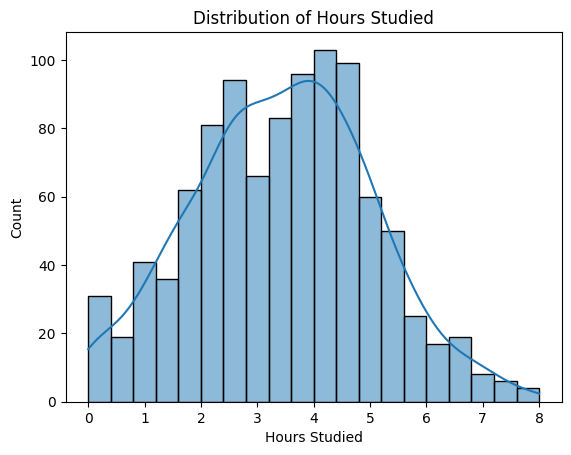

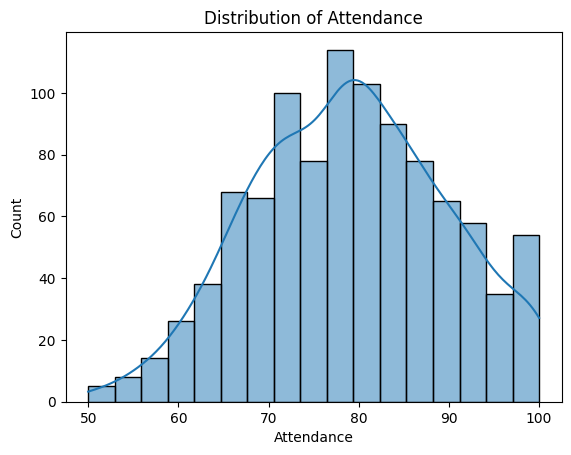

In [14]:
for col in df_numeric:
    sns.histplot(df[col],kde = True)
    plt.title(f'Distribution of {col}')
    plt.show()

## Correlation Between numerical columns

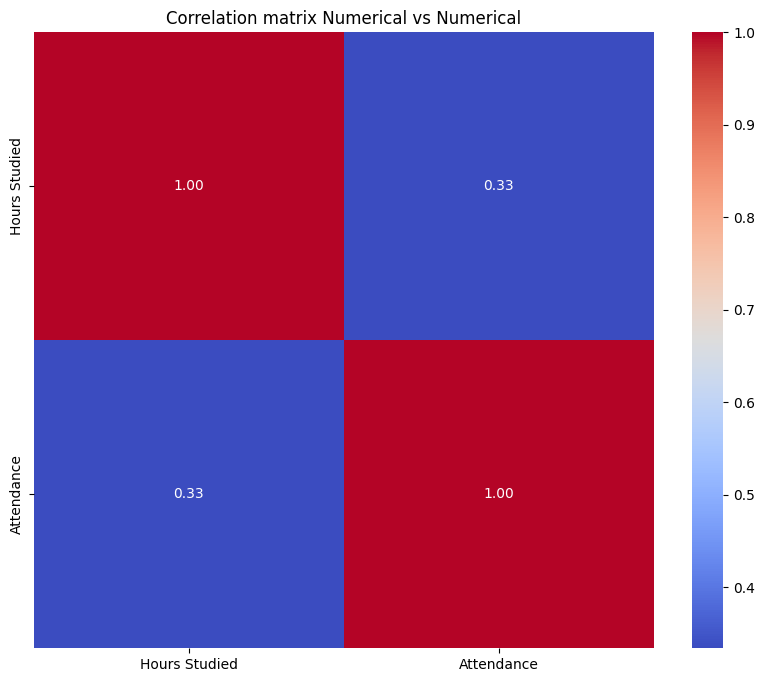

In [15]:
Correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10,8))
sns.heatmap(Correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation matrix Numerical vs Numerical")
plt.show()

## Distribution Between Categorical Values

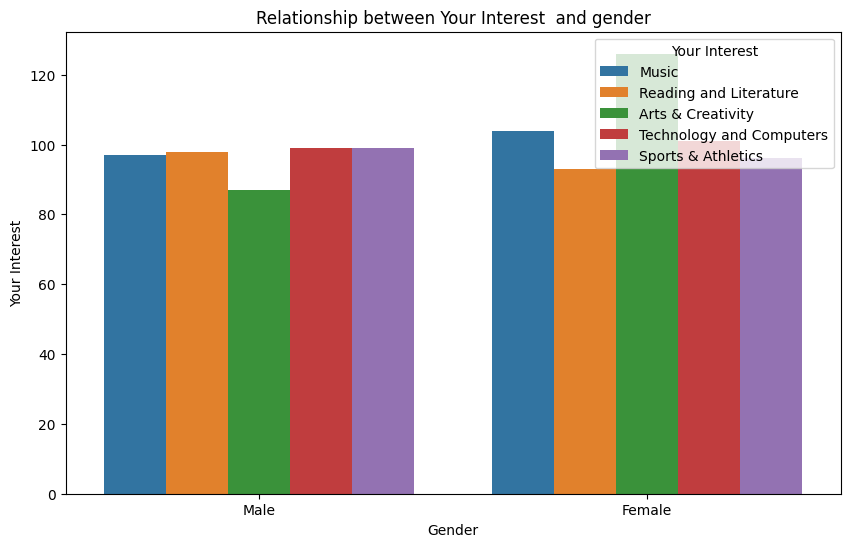

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Your Interest', data=df)

plt.title('Relationship between Your Interest  and gender')
plt.xlabel('Gender')
plt.ylabel('Your Interest')
plt.show()

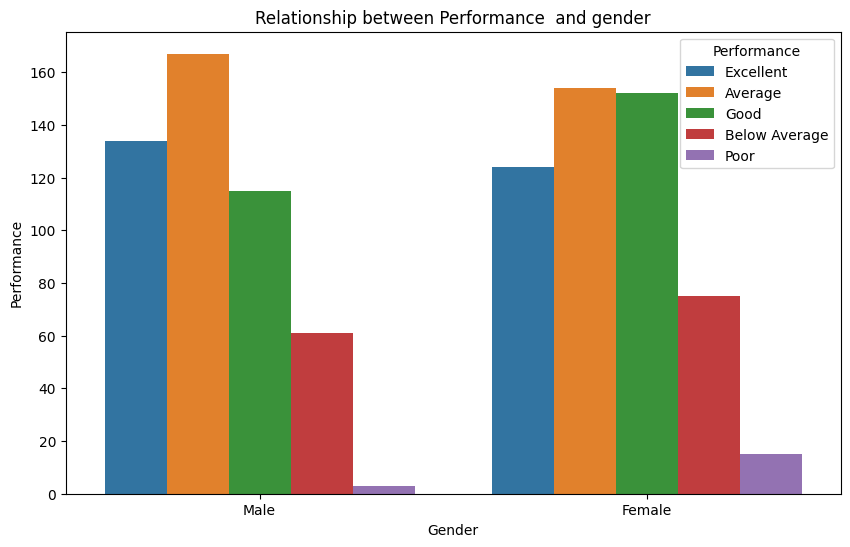

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Performance', data=df)

plt.title('Relationship between Performance  and gender')
plt.xlabel('Gender')
plt.ylabel('Performance')
plt.show()

# 5. Import Necessary Algorithm

In [47]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# 6. separate the Independent Variable and Dependent variable

In [24]:
X = df.iloc[:,0:7]
y = df.iloc[:,-1]

In [94]:
X

,Gender,Parental Education Level,Your Interest,Test Preparation,Hours Studied,Attendance,Class Group
0,Male,High School,Music,Completed,4.7,83.6,B
1,Male,Doctorate,Reading and Literature,Completed,5.0,100.0,D
2,Male,High School,Arts & Creativity,Completed,3.6,72.7,E
3,Male,Master’s Degree,Technology and Computers,unknown,4.9,92.7,E
4,Female,Some College,Sports & Athletics,Completed,3.3,80.4,A
...,...,...,...,...,...,...,...
995,Female,Bachelor’s Degree,Technology and Computers,unknown,3.7,82.5,C
996,Female,Doctorate,Reading and Literature,Completed,5.8,92.1,A
997,Male,Some College,Music,Completed,4.5,95.7,C
998,Female,Doctorate,Music,unknown,2.5,66.2,D


# 7. Encoding the Dependent variable 

In [81]:
label = LabelEncoder()
encoded_y = label.fit_transform(y)

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,encoded_y,test_size = 0.2,random_state = 42)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    1000 non-null   object 
 1   Parental Education Level  1000 non-null   object 
 2   Your Interest             1000 non-null   object 
 3   Test Preparation          1000 non-null   object 
 4   Hours Studied             1000 non-null   float64
 5   Attendance                1000 non-null   float64
 6   Class Group               1000 non-null   object 
 7   Performance               1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [95]:
numeric_cols = ['Hours Studied','Attendance']
categoric_cols = ['Gender','Your Interest','Test Preparation','Class Group']
ordinal = ['Parental Education Level']


In [96]:
df['Parental Education Level'].unique()

array(['High School', 'Doctorate', 'Master’s Degree', 'Some College',
       'Associate Degree', 'Bachelor’s Degree'], dtype=object)

In [97]:
education_categories = [['High School','Some College','Bachelor’s Degree','Master’s Degree','Doctorate','Associate Degree']]

In [110]:
ordinal_encoders = OrdinalEncoder(categories = education_categories)
one_hot = OneHotEncoder(handle_unknown = 'ignore',drop='first')
standard_scaler = StandardScaler()

In [111]:
preprocessor = ColumnTransformer(
    transformers=[
    ('onehot',one_hot,categoric_cols),
    ('scaler',standard_scaler,numeric_cols),
    ('ordinal',ordinal_encoders,ordinal),
    ])

In [112]:
base_learners = [
    ('lr',LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('dt',DecisionTreeClassifier()),
]

In [113]:

final_estimator = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5)


In [114]:
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5
)

# 8. Using Pipeline for fitting the model

In [115]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('stacking',stack_model),
])


In [116]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Your Interest',
                                                   'Test Preparation',
                                                   'Class Group']),
                                                 ('scaler', StandardScaler(),
                                                  ['Hours Studied',
                                                   'Attendance']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              'Some '
                                                                              'College',
                                                                              'Bachelor’s '
                                                                              'Degree',
                                                                              'Master’s '
                                                                              'Degree',
                                                                              'Doctorate',
                                                                              'Associate '
                                                                              'Degree']]),
                                                  ['Parental Education '
                                                   'Level'])])),
                ('stacking',
                 StackingClassifier(cv=5,
                                    estimators=[('lr', LogisticRegression()),
                                                ('knn', KNeighborsClassifier()),
                                                ('dt',
                                                 DecisionTreeClassifier())],
                                    final_estimator=RandomForestClassifier(max_depth=5)))])

# 9. Predict the y value 

In [117]:
y_pred = pipeline.predict(X_test)

In [118]:
y_pred

array([2, 0, 2, 2, 2, 3, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 1,
       0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 1, 2, 0, 3, 2, 3,
       0, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 1, 3, 0, 2, 0, 2, 3, 2,
       0, 3, 2, 2, 3, 2, 3, 2, 2, 0, 3, 1, 1, 2, 1, 1, 3, 3, 3, 1, 1, 0,
       2, 2, 2, 3, 0, 3, 2, 1, 0, 3, 1, 3, 2, 1, 3, 0, 2, 4, 0, 1, 1, 0,
       3, 3, 0, 0, 0, 1, 0, 0, 0, 3, 3, 1, 2, 1, 2, 3, 2, 3, 3, 3, 2, 2,
       3, 3, 0, 1, 1, 4, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 0, 0, 2, 3, 0,
       1, 3, 2, 0, 2, 2, 1, 1, 0, 3, 0, 1, 0, 0, 3, 0, 0, 3, 2, 0, 2, 0,
       1, 2, 0, 4, 3, 3, 3, 2, 2, 0, 3, 0, 0, 3, 3, 0, 2, 3, 0, 2, 0, 2,
       3, 2])

In [120]:
y_pred_train = pipeline.predict(X_train)

In [121]:
y_pred_train

array([3, 3, 0, 0, 1, 0, 0, 0, 0, 2, 1, 3, 3, 0, 3, 0, 1, 1, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 3, 1, 3, 2, 0, 0, 4, 0, 1, 1, 1, 0, 0, 2, 0, 3, 0,
       0, 0, 1, 3, 0, 0, 3, 3, 1, 2, 3, 1, 2, 2, 0, 0, 1, 3, 0, 0, 0, 1,
       2, 0, 3, 2, 3, 1, 2, 2, 3, 1, 0, 1, 2, 2, 1, 4, 2, 3, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 3, 2, 2, 0, 2, 2, 1, 1, 1, 3,
       0, 0, 1, 3, 0, 0, 1, 0, 3, 3, 0, 2, 3, 2, 3, 2, 0, 3, 1, 2, 0, 2,
       3, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 1, 3, 3, 2, 0, 4, 3, 0, 1, 0,
       2, 4, 3, 1, 1, 3, 2, 0, 2, 0, 2, 1, 0, 2, 0, 0, 3, 2, 2, 1, 0, 2,
       0, 1, 0, 3, 3, 0, 2, 0, 2, 2, 2, 0, 1, 2, 3, 3, 2, 0, 1, 2, 0, 2,
       0, 2, 3, 0, 2, 0, 2, 0, 0, 3, 1, 2, 2, 0, 1, 3, 0, 2, 3, 2, 1, 2,
       0, 2, 0, 3, 2, 3, 2, 2, 2, 4, 2, 1, 0, 2, 1, 0, 0, 2, 0, 0, 3, 3,
       3, 3, 3, 2, 0, 3, 2, 1, 2, 3, 2, 2, 0, 0, 2, 3, 1, 3, 3, 0, 0, 1,
       3, 2, 3, 0, 0, 0, 3, 3, 3, 2, 0, 2, 0, 2, 1, 0, 2, 4, 1, 3, 0, 3,
       0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3,

# 10. Check accuracy_score 

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_train,y_pred_train))

0.935
0.96


# 11. plot Decision Boundary

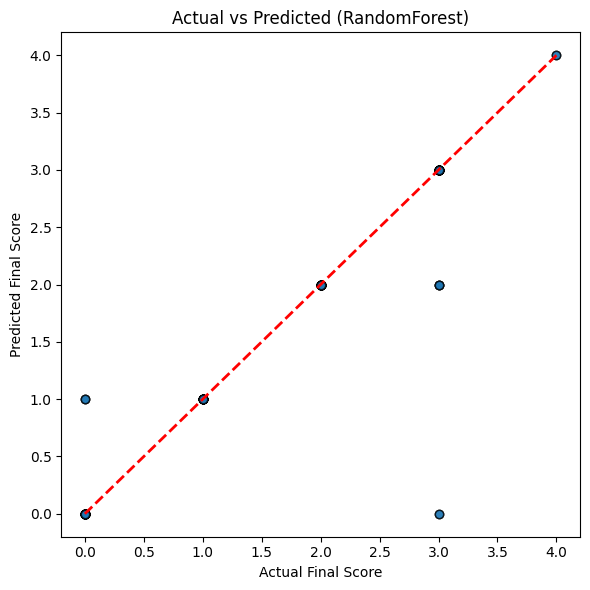

In [124]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.title('Actual vs Predicted (RandomForest)')
plt.tight_layout()
plt.show()